### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [231]:
data = pd.read_csv('data/coupons.csv')

In [232]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [269]:
# drop the car column as it is not interesting because of lack of data
clean_data = data.drop('car', axis=1)

# check the columns which have missing data
isna = [column for column in clean_data.columns if clean_data[column].isna().sum() != 0]
print(clean_data[isna].isna().sum())

# find the number or rows/% of rows that have missing data
temp = clean_data.dropna()
print(f'number of rows dropped = {clean_data.shape[0] - temp.shape[0]}')
print(f'% rows dropped = {(clean_data.shape[0] - temp.shape[0])*100/clean_data.shape[0]}')

# given total number of rows with null data is ~4.8% it should be ok to drop these rows. 
# Also it is not clear how we can guess these missing values from other data, instead seems
# much simpler to drop these rows
clean_data = temp

Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64
number of rows dropped = 605
% rows dropped = 4.769788710186061


4. What proportion of the total observations chose to accept the coupon?



In [270]:
# since Y has only values 0 or 1 and all rows have this value sum of Y column will give the number of accepts
# and count of the rows will be the total number of rows
proportion_accept = clean_data['Y'].sum()/clean_data['Y'].count()
print(proportion_accept)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

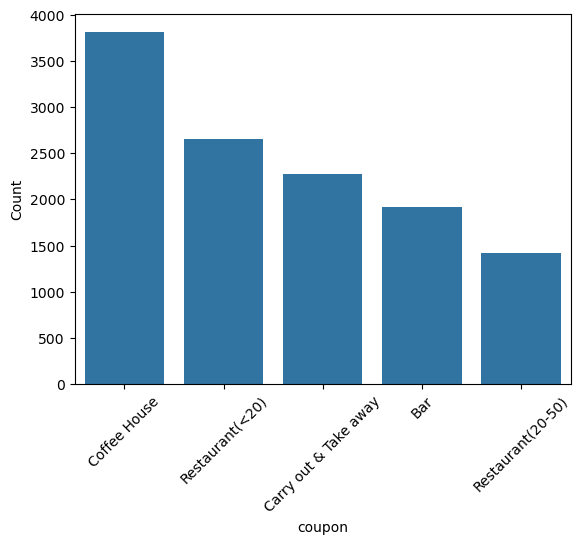

In [321]:
# it is useful to visusalize the number of coupons of each type

value_counts = clean_data['coupon'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

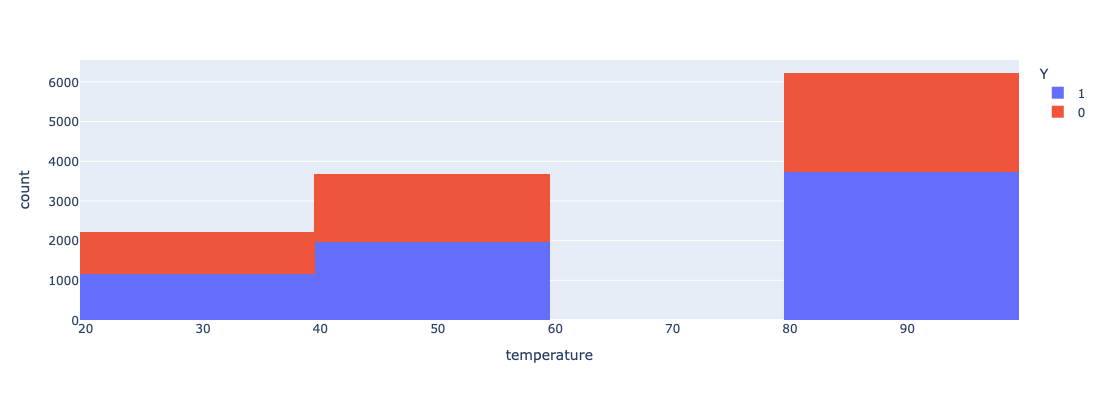

In [308]:
#sns.histplot(clean_data, x='temperature', hue='Y')
px.histogram(data_frame=clean_data, x='temperature', color='Y', width=600, height=400)
# ratio of acceptance for all the temperatures seem similar though 
# 80 degree temperature seems to be higher


In [310]:
# find the ratios of acceptance based on different temperatures
temp_ratios = [clean_data[clean_data['temperature'] == temp]['Y'].sum()
               / clean_data[clean_data['temperature'] == temp]['Y'].count() 
               for temp in [30, 55, 80]]
print(temp_ratios)


[np.float64(0.537129840546697), np.float64(0.5371381758601856), np.float64(0.5996464159434266)]


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [293]:
bar_df = clean_data.loc[clean_data['coupon'] == "Bar"]
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [294]:
print(bar_df['Y'].sum()/bar_df['Y'].count())


0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [295]:
print(f'Number of customers who were offered bar coupons: {bar_df['Bar'].count()}')
# following values capture 3 or less - which includes people who never went to bar
three_or_fewer = [ 'never', 'less1', '1~3']

# it would be useful to also check the ratio of acceptance for people who went to bar at least once
three_or_fewer_not_never = ['less1', '1~3']

# captures values of 4 or more
four_or_more = ['4~8', 'gt8']

# calculate the acceptance rate of 3
three_or_fewer_s = bar_df[bar_df['Bar'].isin(three_or_fewer)]['Y']
print(f'acceptance rate who went to bar 3 or fewer times: {three_or_fewer_s.sum()/three_or_fewer_s.count()}')

# calculate the acceptance rate for 3 or fewer and went to bar at least once (not 'never')
three_or_fewer_never_s = bar_df[bar_df['Bar'].isin(three_or_fewer_not_never)]['Y']
print(f'acceptance rate who went to bar 3 or fewer times and at least once: {three_or_fewer_never_s.sum()/three_or_fewer_never_s.count()}')

# calculate the acceptance rate of 4 or more
four_or_more_s = bar_df[bar_df['Bar'].isin(four_or_more)]['Y']

print(f'acceptance rate who went to bar 4 or more times: {four_or_more_s.sum()/four_or_more_s.count()}')
print(f'total number of customers who went to bar four or more times: {four_or_more_s.count()}')
print(f'total number of customers who went to bar three or fewer times: {three_or_fewer_s.count()}')




Number of customers who were offered bar coupons: 1913
acceptance rate who went to bar 3 or fewer times: 0.37267441860465117
acceptance rate who went to bar 3 or fewer times and at least once: 0.5278969957081545
acceptance rate who went to bar 4 or more times: 0.7616580310880829
total number of customers who went to bar four or more times: 193
total number of customers who went to bar three or fewer times: 1720


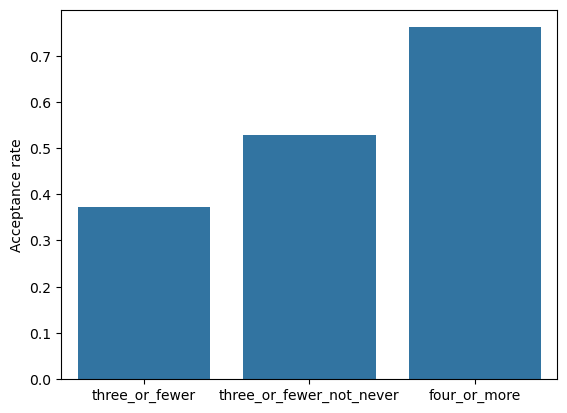

In [320]:
# bar plot the ratios to visualize

sns.barplot(x=['three_or_fewer', 'three_or_fewer_not_never', 'four_or_more'], 
            y=[three_or_fewer_s.sum()/three_or_fewer_s.count(),
               three_or_fewer_never_s.sum()/three_or_fewer_never_s.count(),
               four_or_more_s.sum()/four_or_more_s.count()])
plt.ylabel('Acceptance rate')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [297]:
# capture the possible values for age
over_age_25 = ['26', '31', '36', '41', '46', '50plus']
under_age_25 = ['21', 'below21']

# capture the possible frequency of bar visits
more_than_once = ['1~3', '4~8', 'gt8']
less_than_once = ['never', 'less1']

# calculate acceptance rate over age 25  and more than once a month, note assumption is that 1~3 value captures
# more than once a month
over_25_and_more_than_once = clean_data[(clean_data['age'].isin(over_age_25)) & (clean_data['Bar'].isin(more_than_once))]['Y']
acceptance_over_25 = over_25_and_more_than_once.sum()/over_25_and_more_than_once.count()
print(acceptance_over_25)

# calculate acceptance rate of all others - which is all people who are under age 25 or go to the bar less than once
all_others = clean_data[(clean_data['age'].isin(under_age_25)) | (clean_data['Bar'].isin(less_than_once))]['Y']
acceptance_all_others = all_others.sum()/all_others.count()
print(acceptance_all_others)



0.6230366492146597
0.554066985645933


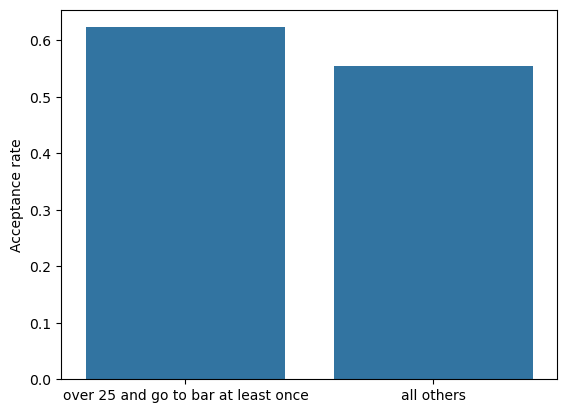

In [319]:
# barplot to visualize the ratios
sns.barplot(x=['over 25 and go to bar at least once', 'all others'], y=[acceptance_over_25, acceptance_all_others])
plt.ylabel('Acceptance rate')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [311]:
# capture values for more than once and less than once
more_than_once = ['1~3', '4~8', 'gt8']
less_than_once = ['never', 'less1']

# calculate drivers who go to bar more than once, had no passengers who were kids and does not have occupation
# (The assumption is that the value kids includes combinations where kids are with friends etc.) and occupation is not
# Farming Fishing & Forestry
drivers_s = clean_data[(clean_data['passanger'] != 'Kid(s)') 
                     & (clean_data['occupation'] != 'Farming Fishing & Forestry') 
                     & (clean_data['Bar'].isin(more_than_once))]['Y']
ratio = drivers_s.sum()/drivers_s.count()
print(ratio)

#calculate acceptance ratio of all others: passanger had a kid or occupation was Farming or visited bar less than once
all_others_s = clean_data[(clean_data['passanger'] == 'Kid(s)') 
                        | (clean_data['occupation'] == 'Farming Fishing & Forestry') 
                        | (clean_data['Bar'].isin(less_than_once))]['Y']
all_others_ratio = all_others_s.sum()/all_others_s.count()
print(all_others_ratio)


0.625
0.5460734828031459


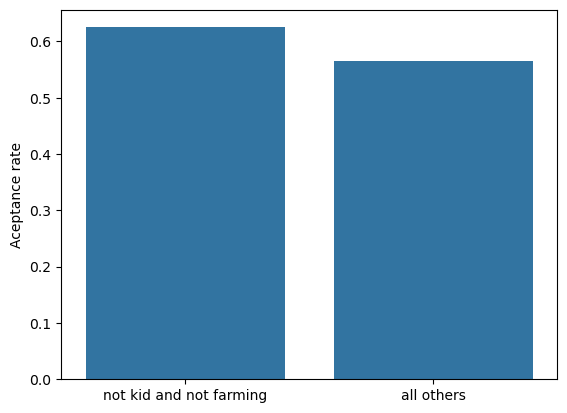

In [322]:
# visualize the ratios using a barplot. It looks like the acceptance rate on the first group
# is higher than all others though not by much (0.625 agaonst 0.546)
sns.barplot(x=['not kid and not farming', 'all others'], y=[ratio, all_others_ratio])
plt.ylabel('Aceptance rate')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



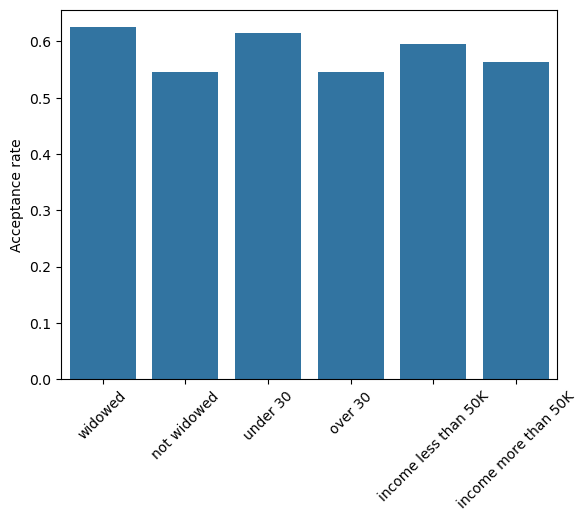

In [317]:
# calculate acceptance rate for users who go to bars more than once a month, passengers not a kid and not widowed

widowed = clean_data[(clean_data['Bar'].isin(more_than_once)) & (clean_data['passanger'] != 'Kid(s)') & (clean_data['maritalStatus'] != 'Widowed')]['Y']
widowed_all_others = clean_data[(clean_data['Bar'].isin(less_than_once)) | (clean_data['passanger'] == 'Kid(s)') | (clean_data['maritalStatus'] == 'Widowed')]['Y']
widowed_ratio = widowed.sum()/widowed.count()
widowed_all = widowed_all_others.sum()/widowed_all_others.count()

# go to bars more than once a month and are under the age of 30

over_age_30 = ['31', '36', '41', '46', '50plus']
under_age_30 = ['26', '21', 'below21']

under_age_30 = clean_data[(clean_data['Bar'].isin(more_than_once)) & (clean_data['age'].isin(over_age_30))]['Y']
all_others_30 = clean_data[(clean_data['Bar'].isin(less_than_once)) | (clean_data['age'].isin(under_age_30))]['Y']
ratio_under_30 = under_age_30.sum()/under_age_30.count()
all_under_30 = all_others_30.sum()/all_others_30.count()

# calculate acceptance rates for users who go to cheap restaurants more than 4 times a month and income is less than 50K.

income_less_50K = ['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
income_more_50K = ['$100000 or More', '$50000 - $62499', 'Less than $12500',
                   '$87500 - $99999', '$75000 - $87499', '$62500 - $74999']

more_than_4 = ['4~8', 'gt8']
less_than_4 = ['1~3', 'less1''never']

cheap_res = clean_data[(clean_data['RestaurantLessThan20'].isin(more_than_4)) & (clean_data['income'].isin(income_less_50K))]['Y']
all_others_res = clean_data[(clean_data['RestaurantLessThan20'].isin(less_than_4)) | (clean_data['income'].isin(income_more_50K))]['Y']
cheap_res_ratio = cheap_res.sum()/cheap_res.count()
all_others_ratio = all_others_res.sum()/all_others_res.count()

# visualize using a bar plot to compare

sns.barplot(x=['widowed', 'not widowed', 'under 30', 'over 30', 'income less than 50K', 'income more than 50K'],
            y=[widowed_ratio, widowed_all, ratio_under_30, all_under_30, cheap_res_ratio, all_others_ratio])
plt.xticks(rotation=45)
plt.ylabel('Acceptance rate')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  